# DataMadness 2023: Ultimate Simpsons Guide

By Jan Grapenthin, Nikola Prianikov, Michael Balzer

## Part 0: Motivation

## Part 1: Data retrieving and Scrapping

TODO:
1. IMDB ratings per episode for age/gender e.g.: https://www.imdb.com/title/tt0701122/ratings/?ref_=tt_ov_rt
    - look for episode titles here: https://www.imdb.com/title/tt0096697/episodes?season=1
2. Episode features from fandom wiki e.g., https://simpsons.fandom.com/wiki/Some_Enchanted_Evening
    - look for things inside <asdie role='region'> blob
3. Episode insight from fandom wiki e.g., https://simpsons.fandom.com/wiki/Some_Enchanted_Evening/References
    - look for Trivia, Cultural References, Goofs, etc...

### What features do we want to add

From IMDB:
* Ratings by demographics per episode (apprx. 600 episodes)

From fandom wiki 'region' blob of episode:
* main_character(s)
* blackboardText
* couchGag
* specialGuestVoices
* Show Runner
* Written By
* Directed By

From fandom wiki References page of each episode
* Cultural references
* Trivia
* Goofs
* Previous Episode References - a bit more detailed here e.g., from which season/episode was the reference made
* Continuity (wtf is this but we can probably keep it)

## Part 2: Exploratory Data Analysis

Everyone plays around with data...

In [11]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [12]:
demographics = pd.read_csv('./Datasets/scraped/voting_demographics.csv')

demographics.describe()
demographics.columns

Index(['Unnamed: 0', 'season', 'episode', 'total_counts', 'total_rating',
       '<18_counts', '<18_rating', '18-29_counts', '18-29_rating',
       '30-44_counts', '30-44_rating', '45+_counts', '45+_rating',
       'male_counts', 'male_rating', 'male_<18_counts', 'male_<18_rating',
       'male_18-29_counts', 'male_18-29_rating', 'male_30-44_counts',
       'male_30-44_rating', 'male_45+_counts', 'male_45+_rating',
       'female_counts', 'female_rating', 'female_<18_counts',
       'female_<18_rating', 'female_18-29_counts', 'female_18-29_rating',
       'female_30-44_counts', 'female_30-44_rating', 'female_45+_counts',
       'female_45+_rating', 'top1000_counts', 'top1000_rating',
       'us_users_counts', 'us_users_rating', 'non-us_users_counts',
       'non-us_users_rating'],
      dtype='object')

<AxesSubplot:ylabel='Density'>

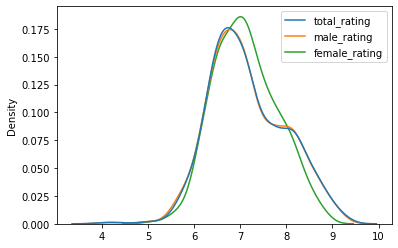

In [13]:
sns.kdeplot(data=[demographics['total_rating'], demographics['male_rating'], demographics['female_rating']], legend=True)


Females give higher ratings on average, indication of much less female voters than male voters since male curve follows total curve accurately while female curve is off.

<AxesSubplot:ylabel='Density'>

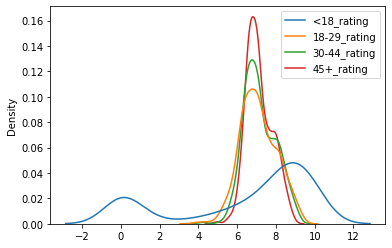

In [14]:
sns.kdeplot(data=[demographics['<18_rating'], demographics['18-29_rating'], demographics['30-44_rating'],demographics['45+_rating']])

The only age group that seems to behave significantly different is the age group <18, which indicates that there is no real influence of the age on voting behavior.

<AxesSubplot:ylabel='Density'>

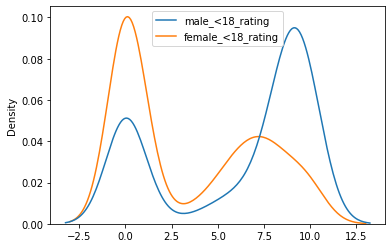

In [15]:
sns.kdeplot(data=[demographics['male_<18_rating'], demographics['female_<18_rating']])

Female voters seem to give mostly bad rating while male voters give mostly good ratings, and the ratings overall just split into two main extremes.

<AxesSubplot:ylabel='Density'>

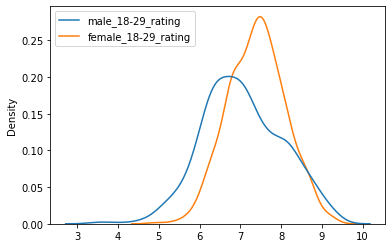

In [16]:
sns.kdeplot(data=[demographics['male_18-29_rating'], demographics['female_18-29_rating']])

As the age progresses the voting behavior seems to unify

<AxesSubplot:ylabel='Density'>

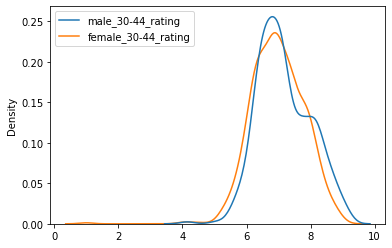

In [17]:
sns.kdeplot(data=[demographics['male_30-44_rating'], demographics['female_30-44_rating']])

Even more similar

<AxesSubplot:ylabel='Density'>

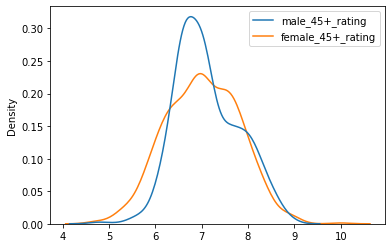

In [18]:
sns.kdeplot(data=[demographics['male_45+_rating'], demographics['female_45+_rating']])

For 45+ the female behavior changes again, possibly due to a difference in population size

<AxesSubplot:xlabel='Unnamed: 0'>

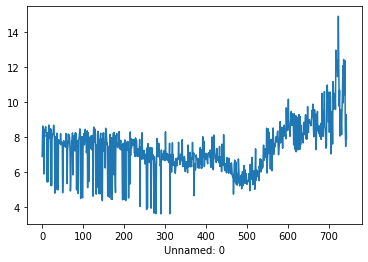

In [19]:
sns.lineplot(x=demographics['Unnamed: 0'], y=demographics['male_counts']/demographics['female_counts'])

As suspected male voter audience 4 to 15 times larger than the female voting audience.

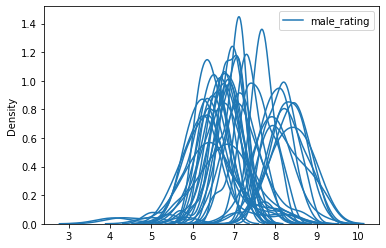

In [20]:
for season in demographics['season'].value_counts().keys():
    sns.kdeplot(data=[demographics.loc[demographics['season'] == season, 'male_rating']])

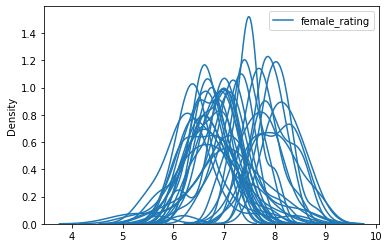

In [21]:
for season in demographics['season'].value_counts().keys():
    sns.kdeplot(data=[demographics.loc[demographics['season'] == season, 'female_rating']])

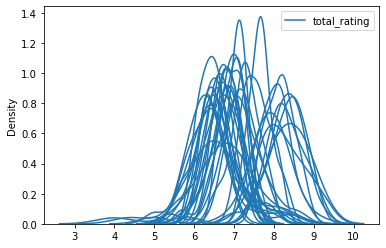

In [22]:
for season in demographics['season'].value_counts().keys():
    sns.kdeplot(data=[demographics.loc[demographics['season'] == season, 'total_rating']])

<AxesSubplot:ylabel='Density'>

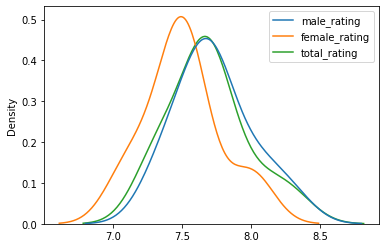

In [23]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 1, 'male_rating'],
                  demographics.loc[demographics['season'] == 1, 'female_rating'],
                   demographics.loc[demographics['season'] == 1, 'total_rating']])

<AxesSubplot:ylabel='Density'>

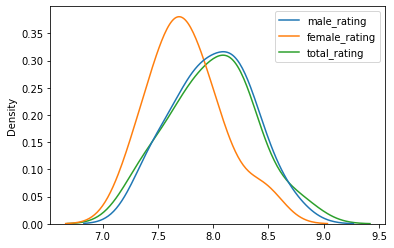

In [24]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 2, 'male_rating'],
                  demographics.loc[demographics['season'] == 2, 'female_rating'],
                   demographics.loc[demographics['season'] == 2, 'total_rating']])

<AxesSubplot:ylabel='Density'>

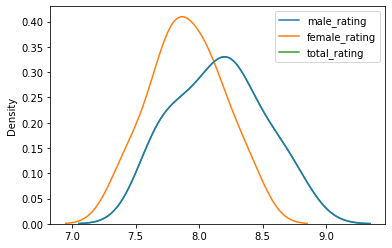

In [25]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 3, 'male_rating'],
                  demographics.loc[demographics['season'] == 3, 'female_rating'],
                   demographics.loc[demographics['season'] == 3, 'total_rating']])

<AxesSubplot:ylabel='Density'>

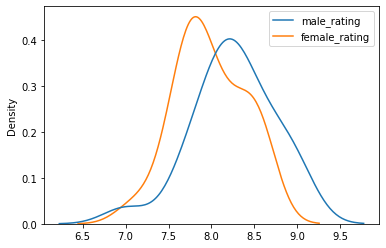

In [26]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 4, 'male_rating'],
                  demographics.loc[demographics['season'] == 4, 'female_rating'],
                   demographics.loc[demographics['season'] == 4, 'female_rating']])

<AxesSubplot:ylabel='Density'>

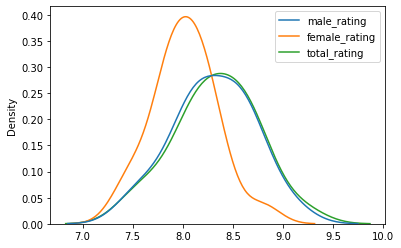

In [27]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 5, 'male_rating'],
                  demographics.loc[demographics['season'] == 5, 'female_rating'],
                   demographics.loc[demographics['season'] == 5, 'total_rating']])

<AxesSubplot:ylabel='Density'>

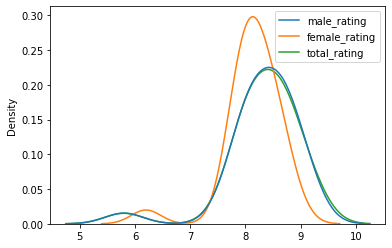

In [28]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 6, 'male_rating'],
                  demographics.loc[demographics['season'] == 6, 'female_rating'],
                   demographics.loc[demographics['season'] == 6, 'total_rating']])

<AxesSubplot:ylabel='Density'>

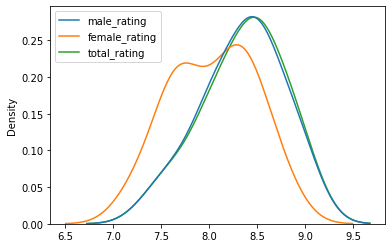

In [29]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 7, 'male_rating'],
                  demographics.loc[demographics['season'] == 7, 'female_rating'],
                   demographics.loc[demographics['season'] == 7, 'total_rating']])

<AxesSubplot:ylabel='Density'>

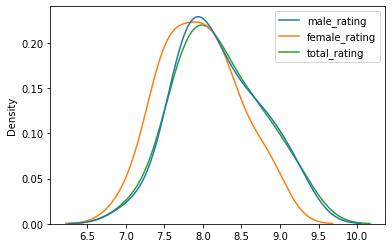

In [30]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 8, 'male_rating'],
                  demographics.loc[demographics['season'] == 8, 'female_rating'],
                  demographics.loc[demographics['season'] == 8, 'total_rating']])

<AxesSubplot:ylabel='Density'>

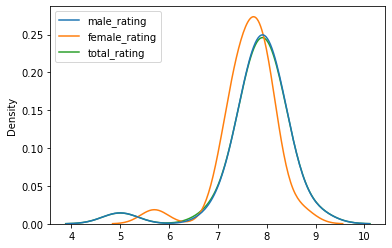

In [31]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 9, 'male_rating'],
                  demographics.loc[demographics['season'] == 9, 'female_rating'],
                  demographics.loc[demographics['season'] == 9, 'total_rating']])

<AxesSubplot:ylabel='Density'>

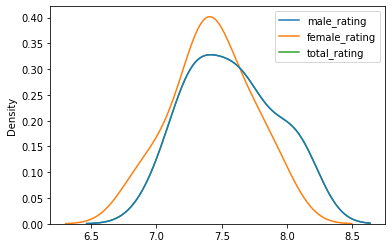

In [32]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 10, 'male_rating'],
                  demographics.loc[demographics['season'] == 10, 'female_rating'],
                  demographics.loc[demographics['season'] == 10, 'total_rating']])

<AxesSubplot:ylabel='Density'>

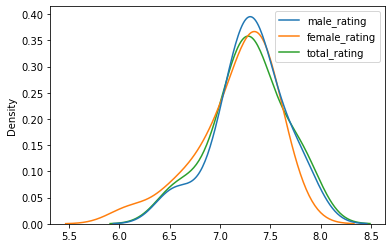

In [33]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 11, 'male_rating'],
                  demographics.loc[demographics['season'] == 11, 'female_rating'],
                  demographics.loc[demographics['season'] == 11, 'total_rating']])

<AxesSubplot:ylabel='Density'>

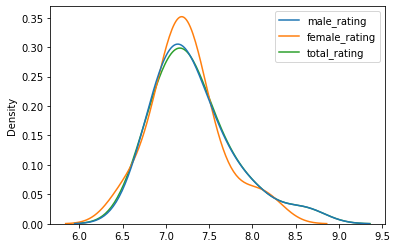

In [34]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 12, 'male_rating'],
                  demographics.loc[demographics['season'] == 12, 'female_rating'],
                  demographics.loc[demographics['season'] == 12, 'total_rating']])

<AxesSubplot:ylabel='Density'>

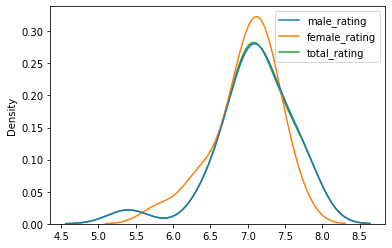

In [35]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 13, 'male_rating'],
                  demographics.loc[demographics['season'] == 13, 'female_rating'],
                  demographics.loc[demographics['season'] == 13, 'total_rating']])

<AxesSubplot:ylabel='Density'>

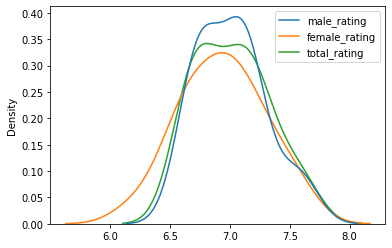

In [36]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 14, 'male_rating'],
                  demographics.loc[demographics['season'] == 14, 'female_rating'],
                  demographics.loc[demographics['season'] == 14, 'total_rating']])

<AxesSubplot:ylabel='Density'>

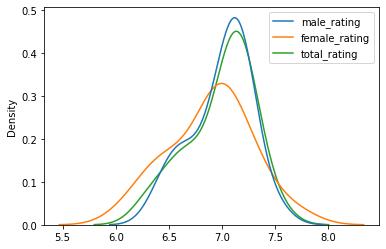

In [37]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 15, 'male_rating'],
                  demographics.loc[demographics['season'] == 15, 'female_rating'],
                  demographics.loc[demographics['season'] == 15, 'total_rating']])

<AxesSubplot:ylabel='Density'>

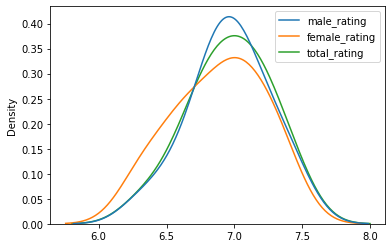

In [38]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 16, 'male_rating'],
                  demographics.loc[demographics['season'] == 16, 'female_rating'],
                  demographics.loc[demographics['season'] == 16, 'total_rating']])

<AxesSubplot:ylabel='Density'>

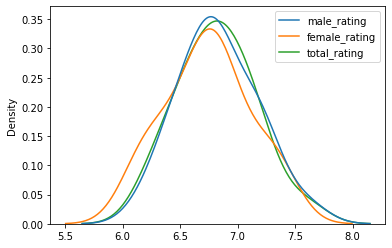

In [39]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 17, 'male_rating'],
                  demographics.loc[demographics['season'] == 17, 'female_rating'],
                  demographics.loc[demographics['season'] == 17, 'total_rating']])

<AxesSubplot:ylabel='Density'>

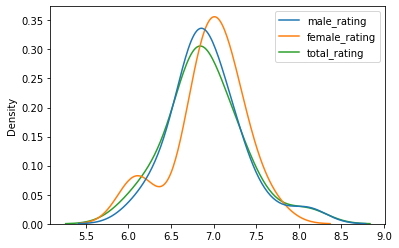

In [40]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 18, 'male_rating'],
                  demographics.loc[demographics['season'] == 18, 'female_rating'],
                  demographics.loc[demographics['season'] == 18, 'total_rating']])

<AxesSubplot:ylabel='Density'>

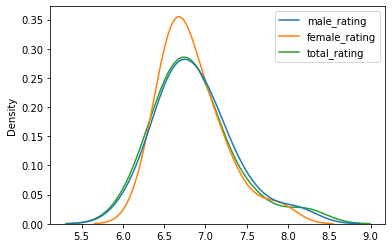

In [41]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 19, 'male_rating'],
                  demographics.loc[demographics['season'] == 19, 'female_rating'],
                  demographics.loc[demographics['season'] == 19, 'total_rating']])

<AxesSubplot:ylabel='Density'>

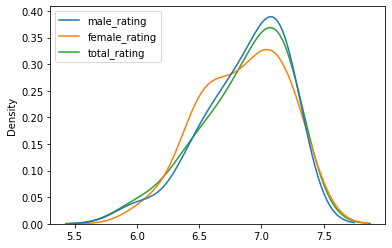

In [42]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 20, 'male_rating'],
                  demographics.loc[demographics['season'] == 20, 'female_rating'],
                  demographics.loc[demographics['season'] == 20, 'total_rating']])

<AxesSubplot:ylabel='Density'>

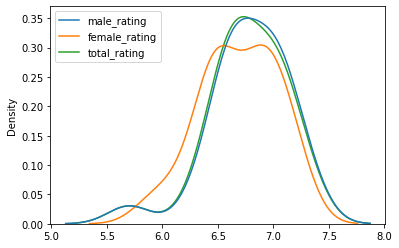

In [43]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 21, 'male_rating'],
                  demographics.loc[demographics['season'] == 21, 'female_rating'],
                  demographics.loc[demographics['season'] == 21, 'total_rating']])

<AxesSubplot:ylabel='Density'>

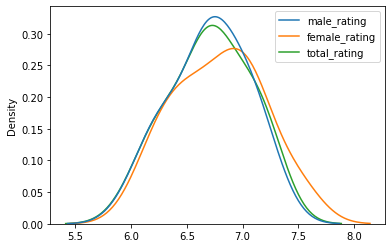

In [44]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 22, 'male_rating'],
                  demographics.loc[demographics['season'] == 22, 'female_rating'],
                  demographics.loc[demographics['season'] == 22, 'total_rating']])

<AxesSubplot:ylabel='Density'>

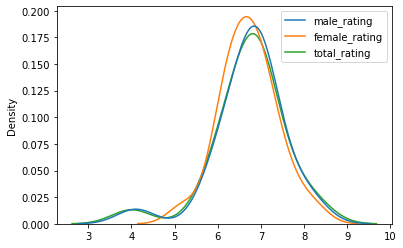

In [45]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 23, 'male_rating'],
                  demographics.loc[demographics['season'] == 23, 'female_rating'],
                  demographics.loc[demographics['season'] == 23, 'total_rating']])

<AxesSubplot:ylabel='Density'>

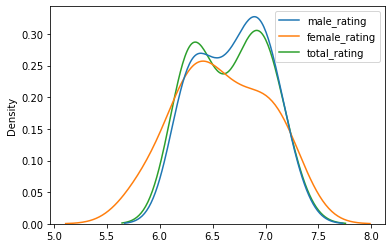

In [46]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 24, 'male_rating'],
                  demographics.loc[demographics['season'] == 24, 'female_rating'],
                  demographics.loc[demographics['season'] == 24, 'total_rating']])

<AxesSubplot:ylabel='Density'>

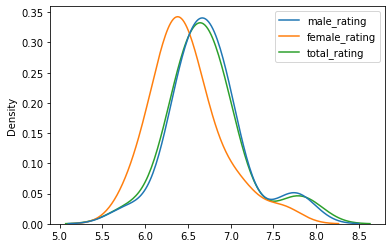

In [47]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 25, 'male_rating'],
                  demographics.loc[demographics['season'] == 25, 'female_rating'],
                  demographics.loc[demographics['season'] == 25, 'total_rating']])

<AxesSubplot:ylabel='Density'>

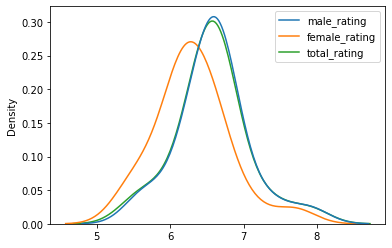

In [48]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 26, 'male_rating'],
                  demographics.loc[demographics['season'] == 26, 'female_rating'],
                  demographics.loc[demographics['season'] == 26, 'total_rating']])

<AxesSubplot:ylabel='Density'>

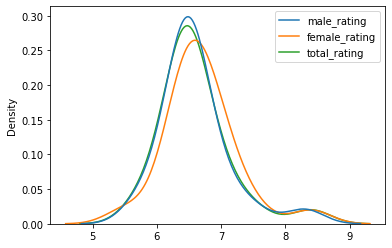

In [49]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 27, 'male_rating'],
                  demographics.loc[demographics['season'] == 27, 'female_rating'],
                  demographics.loc[demographics['season'] == 27, 'total_rating']])

<AxesSubplot:ylabel='Density'>

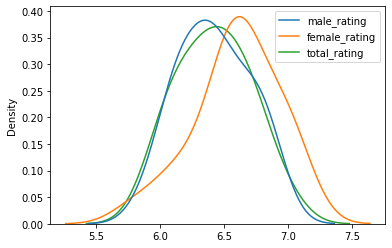

In [50]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 28, 'male_rating'],
                  demographics.loc[demographics['season'] == 28, 'female_rating'],
                  demographics.loc[demographics['season'] == 28, 'total_rating']])

<AxesSubplot:ylabel='Density'>

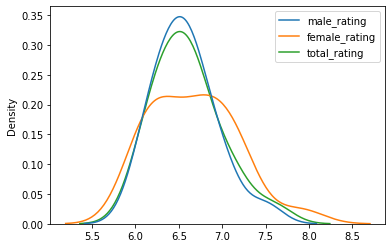

In [51]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 29, 'male_rating'],
                  demographics.loc[demographics['season'] == 29, 'female_rating'],
                  demographics.loc[demographics['season'] == 29, 'total_rating']])

<AxesSubplot:ylabel='Density'>

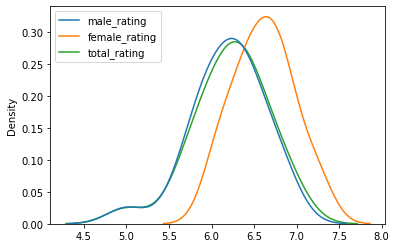

In [52]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 30, 'male_rating'],
                  demographics.loc[demographics['season'] == 30, 'female_rating'],
                  demographics.loc[demographics['season'] == 30, 'total_rating']])

<AxesSubplot:ylabel='Density'>

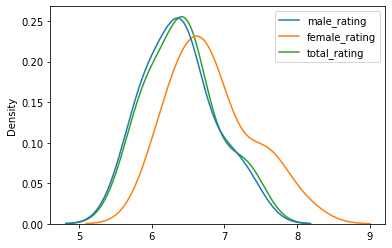

In [53]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 31, 'male_rating'],
                  demographics.loc[demographics['season'] == 31, 'female_rating'],
                  demographics.loc[demographics['season'] == 31, 'total_rating']])

<AxesSubplot:ylabel='Density'>

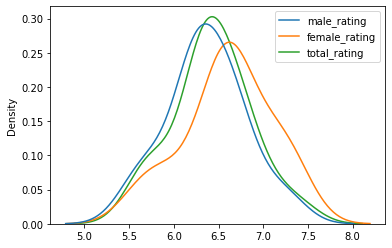

In [54]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 32, 'male_rating'],
                  demographics.loc[demographics['season'] == 32, 'female_rating'],
                  demographics.loc[demographics['season'] == 32, 'total_rating']])

<AxesSubplot:ylabel='Density'>

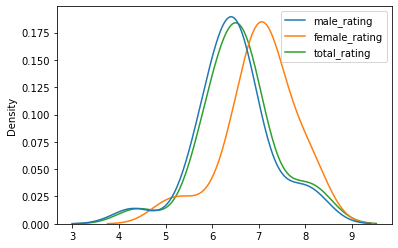

In [55]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 33, 'male_rating'],
                  demographics.loc[demographics['season'] == 33, 'female_rating'],
                  demographics.loc[demographics['season'] == 33, 'total_rating']])

<AxesSubplot:ylabel='Density'>

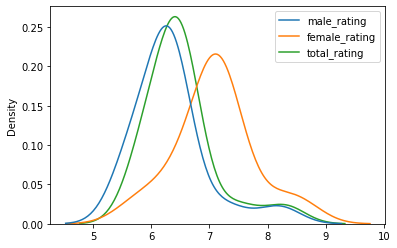

In [56]:
sns.kdeplot(data=[demographics.loc[demographics['season'] == 34, 'male_rating'],
                  demographics.loc[demographics['season'] == 34, 'female_rating'],
                  demographics.loc[demographics['season'] == 34, 'total_rating']])

# Which guest speaker is the best one? #

In this section we are exploring the distribution over the rating of the guest speakers. Are there any guest speakers that perform significantly better than others and are episodes with guest speakers that are generally funnier than other ones?

In [104]:
df = pd.read_csv('Datasets/scraped/box_data.csv')
df.head()

,production_code,voice,chalkboard_gag,couch_gag,show_runner,written_by,directed_by
0,7G08,NaN,NaN,NaN,"James L. Brooks, Matt Groening, Sam Simon",Mimi Pond,David Silverman
1,7G02,"Marcia Wallace, Ms. Mellon","""I will not waste chalk""",Squashed Bart couch gag,"James L. Brooks, Matt Groening, Sam Simon",Jon Vitti,David Silverman
2,7G03,Marcia Wallace,"""I will not skateboard in the halls""",llapsed Couch couch gag,"James L. Brooks, Matt Groening, Sam Simon","Jay Kogen, Wallace Wolodarsky",Wes Archer
3,7G04,NaN,"""I will not burp in class""",Squashed Homer couch gag,"James L. Brooks, Matt Groening, Sam Simon","Al Jean, Mike Reiss","Gregg Vanzo, Kent Butterworth"
4,7G05,NaN,This episode did not feature a chalkboard gag,NaN,"James L. Brooks, Matt Groening, Sam Simon",John Swartzwelder,David Silverman


In [58]:
df_full = df.copy()
df = df.dropna(subset=['voice'])
df['voice'] = df['voice'].str.split(',')
frame = df[['production_code', 'voice']].explode('voice')

In [59]:
speaker_production_code = []
for guest in frame['voice'].unique():
    speaker_production_code.append(frame[frame['voice'] == guest]['production_code'].tolist())

guest_speaker_dict = {}
for i in range(len(speaker_production_code)):
    guest_speaker_dict[frame['voice'].unique()[i]] = speaker_production_code[i]

In [60]:
df_episodes = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_episodes.csv')
df_episodes[['imdb_rating','imdb_votes']] = df_episodes[['imdb_rating','imdb_votes']].fillna(0)
df_episodes[['imdb_rating', 'imdb_votes']] = df_episodes[['imdb_rating', 'imdb_votes']].replace('', 0)


df_guest_speaker_rating = pd.DataFrame(columns=['guest_speaker', 'imdb_rating', 'imd_votes', 'number_of_episodes'])
for i in range(len(speaker_production_code)):
    
    episodes_speaker = guest_speaker_dict[frame['voice'].unique()[i]]
    guest_speaker = frame['voice'].unique()[i]
    num_episodes = len(episodes_speaker)
    episodes_rating = []
    episodes_votes = []

    for episode in episodes_speaker:
        #only take the episodes that we have the data from in the kaggle csv sheet
        if episode not in df_episodes['production_code'].unique():
            continue

        rating = df_episodes.loc[df_episodes['production_code'] == episode, 'imdb_rating'].values[0]
        votes = df_episodes.loc[df_episodes['production_code'] == episode, 'imdb_votes'].values[0]
        episodes_rating.append(rating)
        episodes_votes.append(votes)

    df_guest_speaker_rating.loc[i] = [guest_speaker, episodes_rating, episodes_votes, num_episodes]

In [61]:
df_guest_speaker_rating.to_csv('guest_speaker_rating.csv')
df_guest_speaker_rating.head()

,guest_speaker,imdb_rating,imd_votes,number_of_episodes
0,Marcia Wallace,"[7.8, 7.5, 8.2, 8.3, 8.4, 8.4, 8.2, 8.4, 8.2, ...","[1973.0, 1709.0, 1369.0, 1272.0, 1414.0, 1394....",25
1,Ms. Mellon,[7.8],[1973.0],1
2,Ron Taylor,"[7.6, 8.3]","[1674.0, 1084.0]",2
3,Albert Brooks,"[7.9, 7.5, 6.0, 9.2, 7.2, 7.3, 6.8]","[1638.0, 1578.0, 1051.0, 2439.0, 562.0, 505.0,...",7
4,Sam McMurray,[7.4],[1511.0],1


<AxesSubplot:xlabel='guest_speaker'>

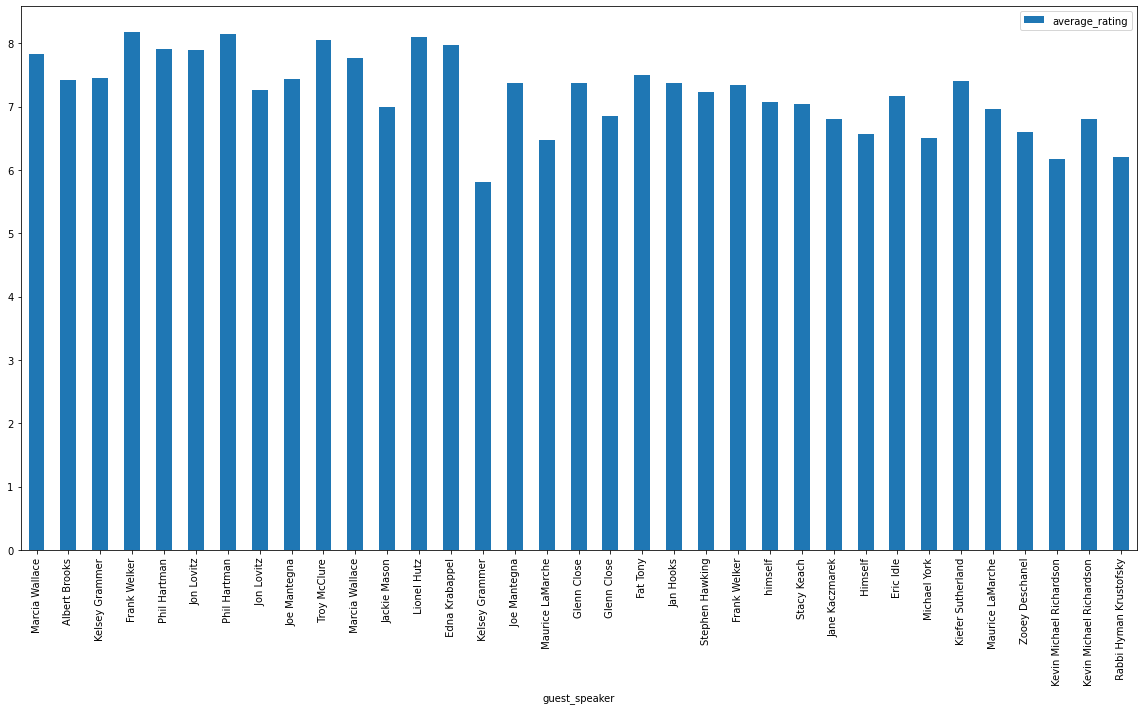

In [63]:
df_guest_speaker_rating.head()
# remove empty arrays from the imdb_rating column
df_guest_speaker_rating = df_guest_speaker_rating[df_guest_speaker_rating['imdb_rating'].map(len) > 0]

df_guest_speaker_rating['average_rating'] = df_guest_speaker_rating['imdb_rating'].apply(lambda x: np.average(x))
df_guest_speaker_rating['average_rating'] = df_guest_speaker_rating['average_rating'].sort_values(ascending=False)

df_guest_speaker_rating[df_guest_speaker_rating['number_of_episodes'] >= 3].plot(x='guest_speaker', y='average_rating', kind='bar', figsize=(20,10))  

It becomes clear that the rating of the guest speakers is uniformly distributed. There doesnt seem to be a guest speaker that stands out from the rest.

# Do episodes with guest speakers get better reviews than the ones without? #

In [85]:
df_guest_speaker = df_full.dropna(subset=['voice'])
df_no_guest_speaker = df_full[df_full['voice'].isna()]

df_episodes = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_episodes.csv')

print('Average with guest speakers',df_episodes[df_episodes['production_code'].isin(df_guest_speaker['production_code'])]['imdb_rating'].mean())
print('Average without a guest speaker',df_episodes[df_episodes['production_code'].isin(df_no_guest_speaker['production_code'])]['imdb_rating'].mean())

Average with guest speakers 7.393873085339169
Average without a guest speaker 7.385074626865671
p-value nan


It also becomes clear that episodes with guest speakers dont get a better rating than episodes without one. 

# Development of speaking time for the simpsons family over the course of time #
In the following script we are trying to find out how the speaking time of each character changes over the course of the seasons. Since the speaking time is roughly linearly dependant on the word count, we counted the words for each character in each episode and added it up over the seasons. To do that we first have to clean the dataset of outliers, because there are a couple values in there that are very unrealistic. Any cell above a 150 words is considered an outlier.

In [65]:
df_scripts = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_script_lines.csv')
df_scripts.head()

# remove outliers from word count
df_scripts = df_scripts[df_scripts['word_count'] < 150]

C:\Users\Jan\AppData\Local\Temp/ipykernel_4196/2168568990.py:1: DtypeWarning: Columns (4,5,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_scripts = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_script_lines.csv')


Then we drop columns without a character_id or no record of the word_count

In [66]:
df_scripts = df_scripts.dropna(subset=['character_id','word_count'])
df_scripts['character_id'] = df_scripts['character_id'].astype(int)
df_scripts['word_count'] = df_scripts['word_count'].astype(int)
df_scripts = df_scripts[['character_id', 'word_count','episode_id']]	

In [94]:
# create a list for each episode that stores the character id and the word count of each character in the episode
episode_id = []
for episode in df_scripts['episode_id'].unique():
    episode_id.append(df_scripts[df_scripts['episode_id'] == episode][['character_id','word_count']].values)

In [95]:
df_characters = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_characters.csv')
df_characters.head()

,id,name,normalized_name,gender
0,7,Children,children,NaN
1,12,Mechanical Santa,mechanical santa,NaN
2,13,Tattoo Man,tattoo man,NaN
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN
4,20,Students,students,NaN


In [101]:
# create a dictionary that stores the episode id as the key and a dict with the character id as the key and the word count as the value
episode_dict = {}
for i,episode in enumerate(df_scripts['episode_id'].unique()):
    character_dict = {}
    list = episode_id[i].tolist()
    for line in list:
        #sum the word count of each character in the episode
        if line[0] not in character_dict:
            character_dict[line[0]] = line[1]
        else:
            character_dict[line[0]] += line[1]
    episode_dict[episode] = character_dict

Now we have a dictionary with the episode_id as a key and a dictionary as a value. The dictionary has the character_id as a key and the word count of the character in that episode as a value. Now we need to group this by the season to get a wordcount for each character per season.

In [97]:
df_characters = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_characters.csv')
df_characters.head()
def map_character_id_to_name(id):
    return df_characters.loc[df_characters['id'] == id, 'normalized_name'].values[0]

for characters in episode_dict.keys():
    episode_dict[characters] = {map_character_id_to_name(key): value for key, value in episode_dict[characters].items()}

In [98]:
season_dict = {}
df_episodes = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_episodes.csv')
# should have just done everything in pandas, stupid!!
for season in df_episodes['season'].unique():
    season_dict[season] = df_episodes.loc[df_episodes['season'] == season, 'id'].values.tolist()
# dictionary that stores the season as the key and dict that has the character id as a key and the word count as the value
season_character_dict = {}
for season in season_dict.keys():
    season_character_dict[season] = {}
    for episode in season_dict[season]:
        # if statement to check if the episode is in the episode_dict
        if episode not in episode_dict.keys():
            continue
        for character in episode_dict[episode].keys():
            if character not in season_character_dict[season]:
                season_character_dict[season][character] = episode_dict[episode][character]
            else:
                season_character_dict[season][character] += episode_dict[episode][character]


In [99]:
df_season_character = pd.DataFrame(columns=['season', 'character', 'word_count'])
# put everything in pandas, good 
for season in season_character_dict.keys():
    for character in season_character_dict[season].keys():
        df_season_character.loc[len(df_season_character.index)] = [season, character, season_character_dict[season][character]]
df_season_character.head()

,season,character,word_count
0,1,eugene fisk,4
1,1,mr fisk,92
2,1,marge simpson,3662
3,1,homer simpson,8146
4,1,bart simpson,4868


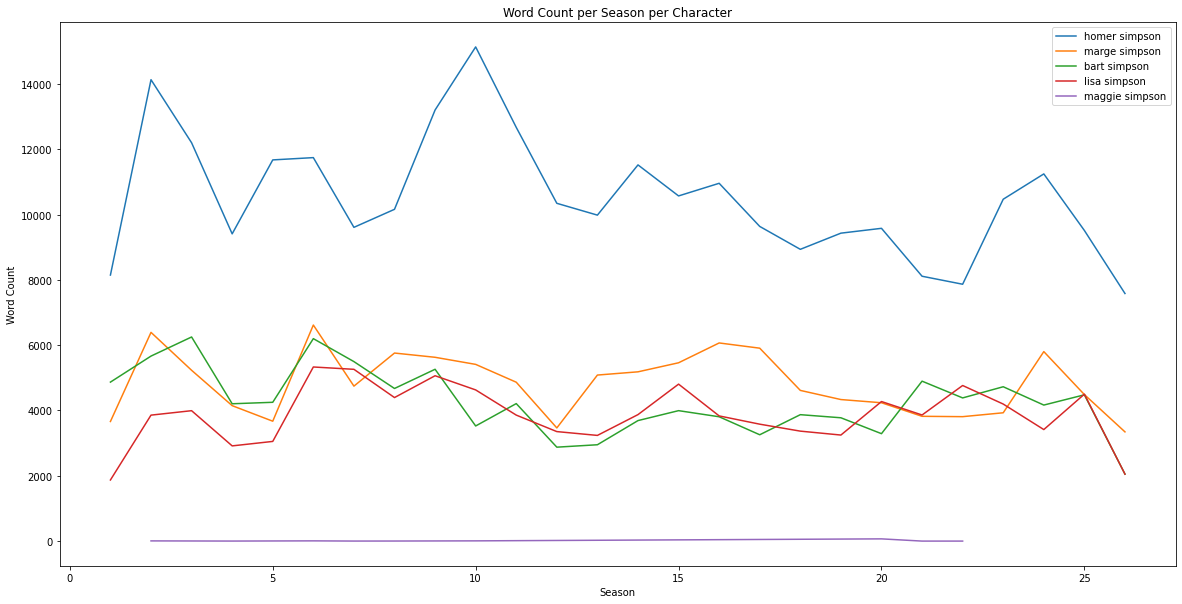

In [103]:
import matplotlib.pyplot as plt
df_season_character_copy = df_season_character.copy()
df_season_character = df_season_character_copy.copy()
''' group by characters and sum the word count per season in descending order and only include a list of characters per season '''
df_season_character = df_season_character.loc[df_season_character['character'].isin(['bart simpson', 'homer simpson', 'lisa simpson', 'maggie simpson', 'marge simpson'])]
df_season_character = df_season_character.groupby(['season','character']).sum().sort_values(by=['season','word_count'], ascending=False).groupby('season').head(5).reset_index()
characters = ['bart simpson', 'homer simpson', 'lisa simpson', 'maggie simpson', 'marge simpson']

fig, ax = plt.subplots(figsize=(20,10))
for character in df_season_character['character'].unique():
    df = df_season_character[df_season_character['character'] == character]
    ax.plot(df['season'], df['word_count'], label=character)
ax.set_xlabel('Season')
ax.set_ylabel('Word Count')
ax.set_title('Word Count per Season per Character')
ax.legend()
plt.show()


It is obvious that the word count does underly some changes but the ranking roughly stays the same. Homer always says the most and Marge, Bart and Lisa have roughly the same speaking time. 

## Part 3: Regressing the ratings, Key variables that explain rating, etc.

## Part 4: Cool insights e.g., TF-IDF on script lines per character

## Part 5: Ethical considerations

## Conclusions